=== Sample Data ===
  DeliveryTime CustomerService ReturnEase  Satisfaction
0       OnTime       Excellent       Easy             5
1         Late            Good       Easy             5
2       OnTime            Good       Easy             5
3       OnTime            Good       Easy             4
4        Early            Good       Easy             5
5        Early            Poor       Easy             3
6        Early            Good       Easy             3
7       OnTime       Excellent       Easy             5
8       OnTime            Good       Easy             5
9       OnTime       Excellent   Moderate             5

=== Satisfaction Count ===
Satisfaction
1     15
2     18
3     37
4     91
5    139
Name: count, dtype: int64

=== Average Satisfaction by Delivery Time ===
DeliveryTime
Early     3.939394
Late      4.137931
OnTime    4.102439
Name: Satisfaction, dtype: float64

=== Average Satisfaction by Customer Service ===
CustomerService
Excellent    4.118056
Good        

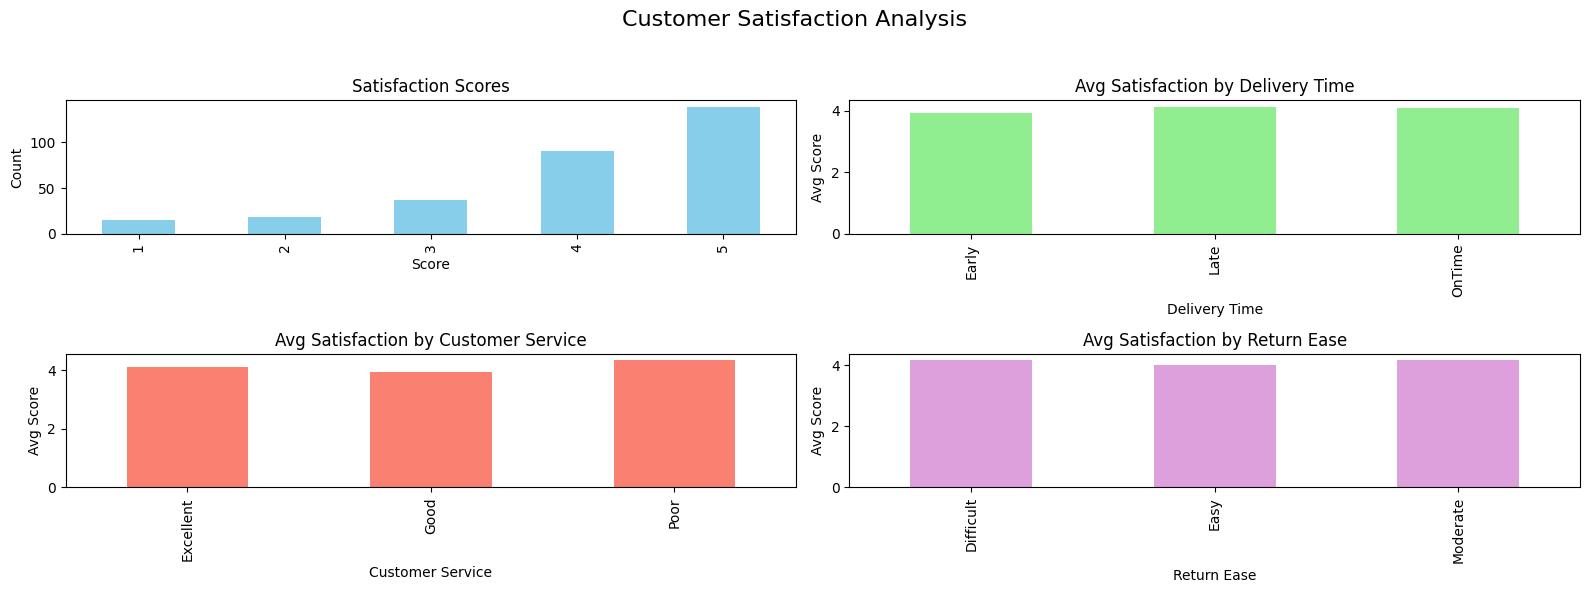

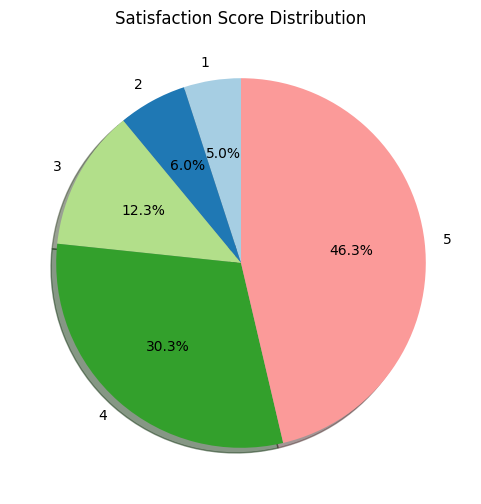


Overall Average Satisfaction: 4.07/5


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the dataset from CSV
df = pd.read_csv("ecommerce_survey_data.csv")

# 2. Show Sample Data and Satisfaction Distribution
print("=== Sample Data ===")
print(df.head(10))
print("\n=== Satisfaction Count ===")
print(df["Satisfaction"].value_counts().sort_index())

# 3. Grouped Satisfaction Averages
print("\n=== Average Satisfaction by Delivery Time ===")
print(df.groupby("DeliveryTime")["Satisfaction"].mean())
print("\n=== Average Satisfaction by Customer Service ===")
print(df.groupby("CustomerService")["Satisfaction"].mean())
print("\n=== Average Satisfaction by Return Ease ===")
print(df.groupby("ReturnEase")["Satisfaction"].mean())

# 4. Visualization
plt.figure(figsize=(16, 6))
plt.suptitle("Customer Satisfaction Analysis", fontsize=16)

# Satisfaction Distribution Bar Chart
plt.subplot(2, 2, 1)
df["Satisfaction"].value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.title("Satisfaction Scores")
plt.xlabel("Score")
plt.ylabel("Count")

# Average Satisfaction by Delivery Time
plt.subplot(2, 2, 2)
df.groupby("DeliveryTime")["Satisfaction"].mean().plot(kind="bar", color="lightgreen")
plt.title("Avg Satisfaction by Delivery Time")
plt.ylabel("Avg Score")
plt.xlabel("Delivery Time")

# Average Satisfaction by Customer Service
plt.subplot(2, 2, 3)
df.groupby("CustomerService")["Satisfaction"].mean().plot(kind="bar", color="salmon")
plt.title("Avg Satisfaction by Customer Service")
plt.ylabel("Avg Score")
plt.xlabel("Customer Service")

# Average Satisfaction by Return Ease
plt.subplot(2, 2, 4)
df.groupby("ReturnEase")["Satisfaction"].mean().plot(kind="bar", color="plum")
plt.title("Avg Satisfaction by Return Ease")
plt.ylabel("Avg Score")
plt.xlabel("Return Ease")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 5. Pie Chart for Satisfaction Distribution
plt.figure(figsize=(6, 6))
df["Satisfaction"].value_counts().sort_index().plot.pie(
autopct='%1.1f%%',
colors=plt.cm.Paired.colors,
startangle=90,
shadow=True
)
plt.title("Satisfaction Score Distribution")
plt.ylabel("")
plt.show()

# 6. Key Insight
overall_avg = df["Satisfaction"].mean()
print(f"\nOverall Average Satisfaction: {overall_avg:.2f}/5")